### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:Blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_Import Libraries_**</p>

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 1000)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', 100)

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "colab"
#To display the plots
%matplotlib inline
from ipywidgets import interact

<a style="color:Blue" >**Reading data into the program**</a>

In [2]:
df0 = pd.read_csv("EXIST_2018.csv")
df0

,Date,Hour,HOLY,MCP,MCP_24,MCP_168,MCP_672,PISO,PIBO,SSOV,SBOV,MO,MB,TV,DER,TG,NG,HYD,LIG,RYHD,ICOAL,WIND,SOL,FUEL,GEO,ASPH,BCOAL,BIO,IMEX,WAS,GASP,ANK,IST
0,2018-01-01,00:00:00,0,55.040,47.440,38.250,27.810,8197.900,10649.500,29100.300,15069.800,12011.600,12011.700,544371.189,3.777,30379.530,7955.330,5748.650,5166.650,1898.920,6356.820,1482.380,0.000,179.200,781.240,280.410,198.500,246.280,0.000,85.150,186.435,1.800,7.800
1,2018-01-01,01:00:00,0,54.440,41.560,38.250,36.590,9161.100,6188.700,31475.500,15687.000,12662.200,12662.200,515520.340,3.777,28280.820,7465.350,4512.220,5159.900,1845.040,6077.710,1438.050,0.000,183.100,785.670,282.620,198.500,244.890,0.000,87.770,186.435,1.500,8.100
2,2018-01-01,02:00:00,0,43.730,26.180,27.810,36.590,9592.400,6017.900,32891.800,15444.200,12693.800,12693.900,360364.316,3.777,26811.790,6907.140,3909.250,5173.990,1886.980,5701.790,1464.770,0.000,179.400,791.230,273.780,194.500,247.690,0.000,81.270,186.435,1.100,7.600
3,2018-01-01,03:00:00,0,40.970,25.130,35.520,26.710,9375.700,5831.100,33120.300,15043.500,12297.700,12297.800,335572.221,3.777,25900.830,6836.270,3496.040,5222.010,1783.040,5216.620,1575.780,0.000,176.700,791.420,273.780,196.500,248.080,0.000,84.590,186.435,0.500,7.400
4,2018-01-01,04:00:00,0,29.860,25.130,38.250,36.390,9234.300,5693.800,33213.900,14953.700,12208.200,12208.300,333326.464,3.777,25454.700,6728.720,3231.800,5183.250,1724.650,5110.530,1711.830,0.000,182.900,783.440,273.780,193.500,245.110,0.000,85.190,186.435,0.000,7.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43674,2023-01-01,19:00:00,0,224.620,236.140,257.250,257.920,9750.400,19752.600,25083.100,25596.200,21304.800,21304.800,4845274.365,18.703,34711.430,9254.910,5524.660,5446.660,978.900,9269.390,687.700,0.000,65.000,1261.830,75.070,419.280,964.680,688.160,75.190,1032.200,0.000,11.900
43675,2023-01-01,20:00:00,0,224.620,205.870,202.210,241.800,9483.400,19108.900,24367.500,24884.300,20850.000,20849.600,4371176.106,18.703,33235.310,8855.380,4281.830,5379.670,1063.010,9292.520,789.030,0.000,65.300,1268.060,72.860,401.920,981.630,704.390,79.710,1032.200,0.000,12.000
43676,2023-01-01,21:00:00,0,224.620,216.080,241.170,161.200,9577.500,18428.100,24863.600,24161.900,19928.800,19928.800,4249568.776,18.703,31937.540,7538.880,4016.780,5536.550,1038.450,9270.580,908.460,0.000,66.100,1277.350,75.070,382.890,975.860,769.550,81.020,1032.200,-0.300,12.200
43677,2023-01-01,22:00:00,0,184.050,190.970,203.600,204.130,9633.400,16617.700,24073.200,22520.400,18569.400,18569.400,3665598.832,18.703,31004.800,5918.090,4743.610,5408.150,999.920,9272.480,1025.830,0.000,64.400,1286.910,75.070,397.090,973.410,768.780,71.060,1032.200,-1.100,12.100


In [3]:
df = df0.copy()

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:Blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_DATA Preprocessing_**</p>

- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale.

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error 
from sklearn.model_selection import train_test_split

from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, cross_validate, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet

from sklearn.pipeline import Pipeline

from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor, plot_importance
from catboost import CatBoostRegressor, cv, Pool
from sklearn.impute import SimpleImputer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Train / Test and Split_**</p>

In [30]:
X = df.drop('MCP',axis=1)
y = df['MCP']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=35)

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Scaling_**</p>

In [32]:
scaler = MinMaxScaler().set_output(transform="pandas")
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
print("df boyutu:", df.shape)

print("X_train'in boyutu:", X_train.shape)
print("y_train'in boyutu:", y_train.shape)

print("X_test'in boyutu:", X_test.shape)
print("y_test'in boyutu:", y_test.shape)

df boyutu: (43679, 31)
X_train'in boyutu: (34943, 30)
y_train'in boyutu: (34943,)
X_test'in boyutu: (8736, 30)
y_test'in boyutu: (8736,)


## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_Modelling_**</p>

- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [34]:
def mape(y_true, y_pred):
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    absolute_percentage_error[~np.isfinite(absolute_percentage_error)] = 0  # "inf" değerlerini 0'a dönüştür
    return np.mean(absolute_percentage_error) * 100

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2": r2_score(y_train, y_train_pred),
                        "mae": mean_absolute_error(y_train, y_train_pred),
                        "mse": mean_squared_error(y_train, y_train_pred),
                        "rmse": mean_squared_error(y_train, y_train_pred, squared=False),
                        "mape": mape(y_train, y_train_pred)},
              "test": {"R2": r2_score(y_test, y_pred),
                       "mae": mean_absolute_error(y_test, y_pred),
                       "mse": mean_squared_error(y_test, y_pred),
                       "rmse": mean_squared_error(y_test, y_pred, squared=False),
                       "mape": mape(y_test, y_pred)}}

    return pd.DataFrame(scores)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_1.XGBoost Regression_**</p>

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Vanilla XGboost model_**</p>

In [35]:
operations = [ ("XGB_model", XGBRegressor(random_state=35))]

pipe_model_xgb = Pipeline(steps=operations)

pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=35, ...))])

In [36]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

,train,test
R2,0.979,0.937
mae,4.666,6.937
mse,51.450,157.303
rmse,7.173,12.542
mape,34.054,64.489


### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Cross Validation XGB_**</p>

In [37]:
operations = [("XGB_model", XGBRegressor(random_state=35))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                0.937
train_r2                               0.980
test_neg_mean_absolute_error          -6.870
train_neg_mean_absolute_error         -4.582
test_neg_mean_squared_error         -155.525
train_neg_mean_squared_error         -49.144
test_neg_root_mean_squared_error     -12.463
train_neg_root_mean_squared_error     -7.009
dtype: float64

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_XGB Model GridsearchCV_**</p>

In [45]:
xgb_param_grid = {"XGB_model__n_estimators":[85,90,95],
              "XGB_model__max_depth":[6,7,8], 
              "XGB_model__learning_rate": [0.1], # 0,1 ile 0,01
              "XGB_model__subsample": [1], # 0,8 ile 1
              "XGB_model__colsample_bytree":[0.5,0.6,0.7], #  0,3'ten 0,8
              "XGB_model__colsample_bylevel":[1]
              }

In [46]:
operations = [("XGB_model", XGBRegressor(random_state=35))]

model = Pipeline(steps=operations)

grid_model_xgb = GridSearchCV(estimator=model,
                          param_grid=xgb_param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [47]:
grid_model_xgb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('XGB_model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     interaction_constra...
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=35, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bylevel': [1],
                         'XGB_model__colsample_bytree': [0.5, 0.6, 0.7],
                         'XGB_model__learning_rate': [0.1],
                         'XGB_model__max_depth': [6, 7, 8],
                         'XGB_model__n_estimators': [85, 90, 95],
                         'XGB_model__subsample': [1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [48]:
grid_model_xgb.best_params_

{'XGB_model__colsample_bylevel': 1,
 'XGB_model__colsample_bytree': 0.5,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 8,
 'XGB_model__n_estimators': 95,
 'XGB_model__subsample': 1}

In [49]:
eval_metric(grid_model_xgb, X_train, y_train, X_test, y_test)

,train,test
R2,0.981,0.940
mae,4.481,6.700
mse,46.621,150.554
rmse,6.828,12.270
mape,32.011,64.052


### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Error Metrics_**</p>

In [50]:
y_pred_xgb = grid_model_xgb.predict(X_test)

In [52]:
my_dict = {"Actual": y_test, "Pred": y_pred_xgb, "Residual":y_test-y_pred_xgb, "LSE":(y_test-y_pred_xgb)**2, "ABS": abs(y_test-y_pred_xgb)}

In [53]:
comparing = pd.DataFrame(my_dict)
comparing

# Error metriclerinin LSE ve ABS üzerinden nasıl hesaplandığını göreceğiz.

,Actual,Pred,Residual,LSE,ABS
13387,52.710,42.489,10.221,104.472,10.221
32288,71.390,66.041,5.349,28.607,5.349
19601,7.560,25.560,-18.000,323.983,18.000
19962,29.190,26.262,2.928,8.576,2.928
39835,180.730,173.115,7.615,57.987,7.615
...,...,...,...,...,...
24612,37.960,40.969,-3.009,9.054,3.009
15247,53.420,49.630,3.790,14.362,3.790
32018,61.480,73.361,-11.881,141.162,11.881
30876,71.640,72.097,-0.457,0.209,0.457


In [54]:
result_sample = comparing.iloc[:, :3]
result_sample

# actual, pred ve residual'u görselleştirmek için df'in ilk 3 featurenı filtreledik

,Actual,Pred,Residual
13387,52.710,42.489,10.221
32288,71.390,66.041,5.349
19601,7.560,25.560,-18.000
19962,29.190,26.262,2.928
39835,180.730,173.115,7.615
...,...,...,...
24612,37.960,40.969,-3.009
15247,53.420,49.630,3.790
32018,61.480,73.361,-11.881
30876,71.640,72.097,-0.457


<a style="color:Blue" >**R2**</a>


**_R2_score, elimizdeki mevcut featurlar ile targettaki değişimin ne kadarını açıklayabiliyorum.
Veya targetı doğru tahmin edebilmek için gerekli olan bilginin ne kadarına sahibim sorularına cevap verir._**

In [55]:
xgb_R2 = round(r2_score(y_test, y_pred_xgb),2)
xgb_R2

0.94

<a style="color:Blue" >**MAE**</a>


**_Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) mutlak değerlerinin toplamının gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala mutlak hata (mae) tespit edilir. mae yapılan kötü tahminleri cezalandırmadığından tercih edilmez._**

- comparing.ABS.sum() / X_test.shape[0]

In [56]:
xgb_mae = round(mean_absolute_error(y_test, y_pred_xgb),2)
xgb_mae

6.7

<a style="color:Blue" >**MSE**</a>


**_Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) karesinin toplamının gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala kare hata (mse) tespit edilir. mse yapılan kötü tahminleri cezalandırır ama target biriminin karesi olduğundan yorumlanması zordur. Bu sebeple tercih edilmez._**

- comparing.LSE.sum() / X_test.shape[0]

In [ ]:
xgb_mse = round(mean_squared_error(y_test, y_pred_xgb),2)
xgb_mse

<a style="color:Blue" >**RMSE**</a>

**_Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) karesinin toplamının gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala kare hata (mse) tespit edilir ve mse'nin karakökü alınarak error metriğimiz target ile aynı birime dönüştürülür. Bu şekilde yorumlanması ve anlaşılması kolay bir hale gelir. rmse yapılan kötü tahminleri hem cezalandırır hemde targetla aynı birim olduğundan yorumlanması kolaydır. Bu sebeple çoğunlukla bu metric tercih edilir._**

- (comparing.LSE.sum()/X_test.shape[0])**0.5

In [58]:
xgb_rmse = round(mean_squared_error(y_test, y_pred_xgb, squared=False),2)
xgb_rmse

12.27

<a style="color:Blue" >**MAPE**</a>

In [59]:
xgb_mape = round(mean_absolute_error(y_test, y_pred_xgb),2)
xgb_mape

6.7

<a style="color:Blue" >**_Plotting residuals_**</a>

In [66]:
residuals = y_test-y_pred_xgb

# Bir datanın linear reg. uygun olup olmadığını anlamak için gerekli olan bazı assumptionların kontrolü için önce
# test datasındaki residualleri hesaplıyoruz.

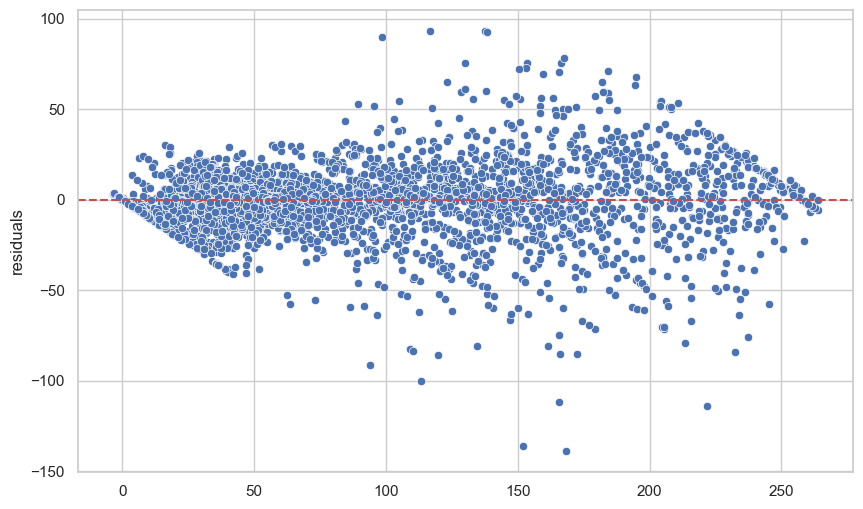

In [67]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_pred_xgb, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

# simple linear reg. özelinde feature ile target arasında anlamlı bir corr varsa data linear reg. için uygundur
# diyebiliyorduk. Ancak, multiple lin.reg.da tüm featurlar ile target arasındaki anlamlı corr ilişkisine bakarak yorum
# yapmak bizi yanıltabilir. Bu durumlarda aşağıdaki assumptionları arayacağız.


# residulaer;
# 1. hatanın 0 olduğu eksenin her iki tarafınada yaklaşık olarak hem eşit hem de random  olarak dağılacak
# 2. Bu dağılım normal dağılıma uygun olacak
# eğer bu şartlar sağlanıyorsa data linear reg. için uygun bir datadır diyebiliriz.

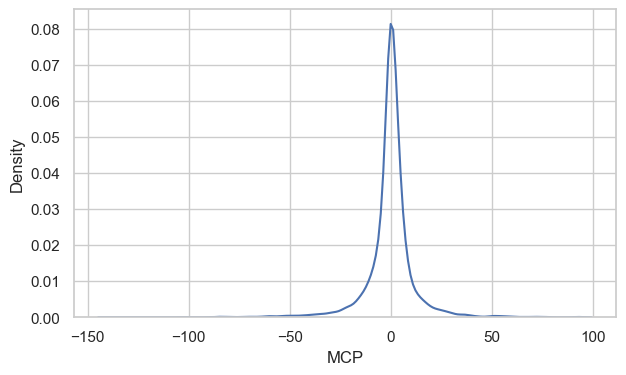

In [68]:
sns.kdeplot(residuals)
plt.show();

# residulerin kdeplotu üzerinden normal dağılıma uyup uymadığ kontrol edilebilir

<IPython.core.display.Javascript object>

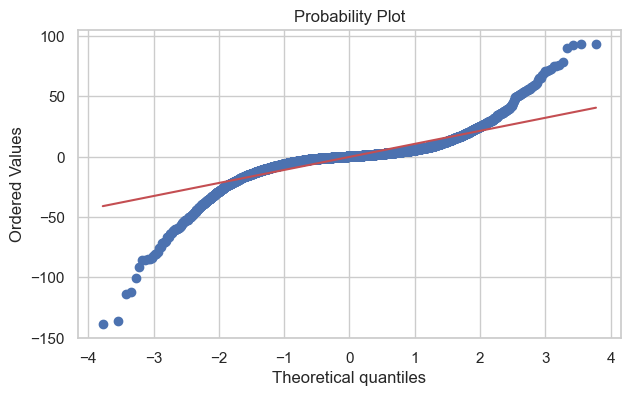

In [69]:
stats.probplot(residuals, dist ="norm", plot =plt)
plt.show();


# ayrıca residulerin probability plot üzerinden de normal dağılıma uyup uymadığ kontrol edilebilir

In [70]:
from scipy.stats import skew
skew(residuals)

# skew değerleri üzerinden de yorum yapabiliriz. skew değeri -0.5 ile +0.5 arasında ise datanın normal dağılıma çok uygun
# olduğunu, -1 ile +1 arasındaki değerlerin normal dağılıma uygun olduğunu,
# -1, +1 değerlerinden sonra yavaş yavaş normal dağılımın bozulmaya başladığını söyleyebiliriz.

-0.932905159235008

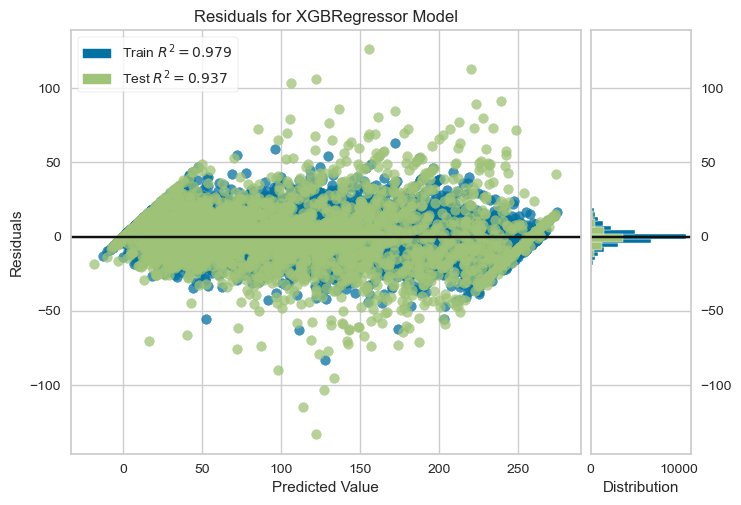

In [71]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
xgboost = XGBRegressor()
visualizer = ResidualsPlot(xgboost)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

# son zamanlarda ML görselleştirmelerinde sıklıkla tercih edilen bir kütüphane
# residuallerin dağılımına hem train hem de test seti için bakabiliyoruz.

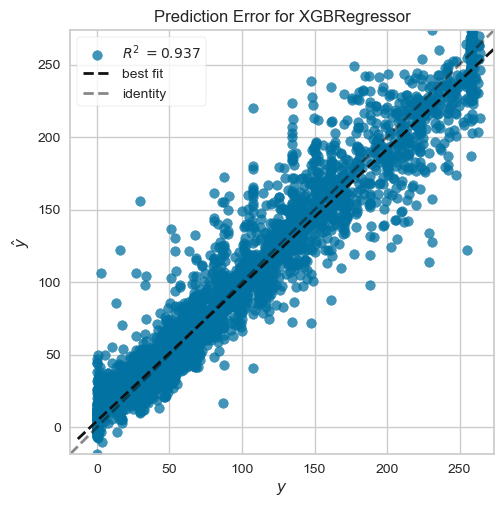

In [72]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
xgboost = XGBRegressor()
visualizer = PredictionError(xgboost)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# y ekseninde predictionlarımız, x ekseninde ise gerçek değerlerimiz yer alıyor. silik olan çizgi modelin tahmnilerinin
# mükemmel olduğu noktaları. koyu renki olan çizgi ise modelimizin eğitim sonrası çizdiğ best fit line temsil ediyor.
# koyu olan çizgi ile silik olan çizgi ne kadar birbirine yakın olursa modelin tahminleri o kadar iyi demektir.

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Feature Importance_**</p>

In [76]:
X_train.columns

Index(['HOLY', 'MCP_24', 'MCP_168', 'MCP_672', 'PISO', 'PIBO', 'SSOV', 'SBOV',
       'MO', 'MB', 'TV', 'DER', 'TG', 'NG', 'HYD', 'LIG', 'RYHD', 'ICOAL',
       'WIND', 'SOL', 'FUEL', 'GEO', 'ASPH', 'BCOAL', 'BIO', 'LNG', 'IMEX',
       'WAS', 'GASP', 'ANK', 'IST'],
      dtype='object')

In [77]:
grid_model_xgb.feature_importances_

array([0.01759062, 0.4862951 , 0.07717559, 0.03725811, 0.00441679,
       0.00410574, 0.00428859, 0.00573626, 0.00547109, 0.00207906,
       0.01430259, 0.09814043, 0.00912887, 0.01234392, 0.00842671,
       0.00546275, 0.00715818, 0.00723953, 0.0062819 , 0.01053408,
       0.00473124, 0.00418436, 0.00630475, 0.00651977, 0.00827797,
       0.00492232, 0.0097298 , 0.0032526 , 0.11699596, 0.00538816,
       0.00625721], dtype=float32)

In [78]:
feats = pd.DataFrame(index=X_train.columns,
                     data=grid_model_xgb.feature_importances_,
                     columns=['Importance'])
imp_feats = feats.sort_values("Importance")
imp_feats

,Importance
MB,0.002
WAS,0.003
PIBO,0.004
GEO,0.004
SSOV,0.004
PISO,0.004
FUEL,0.005
LNG,0.005
ANK,0.005
LIG,0.005


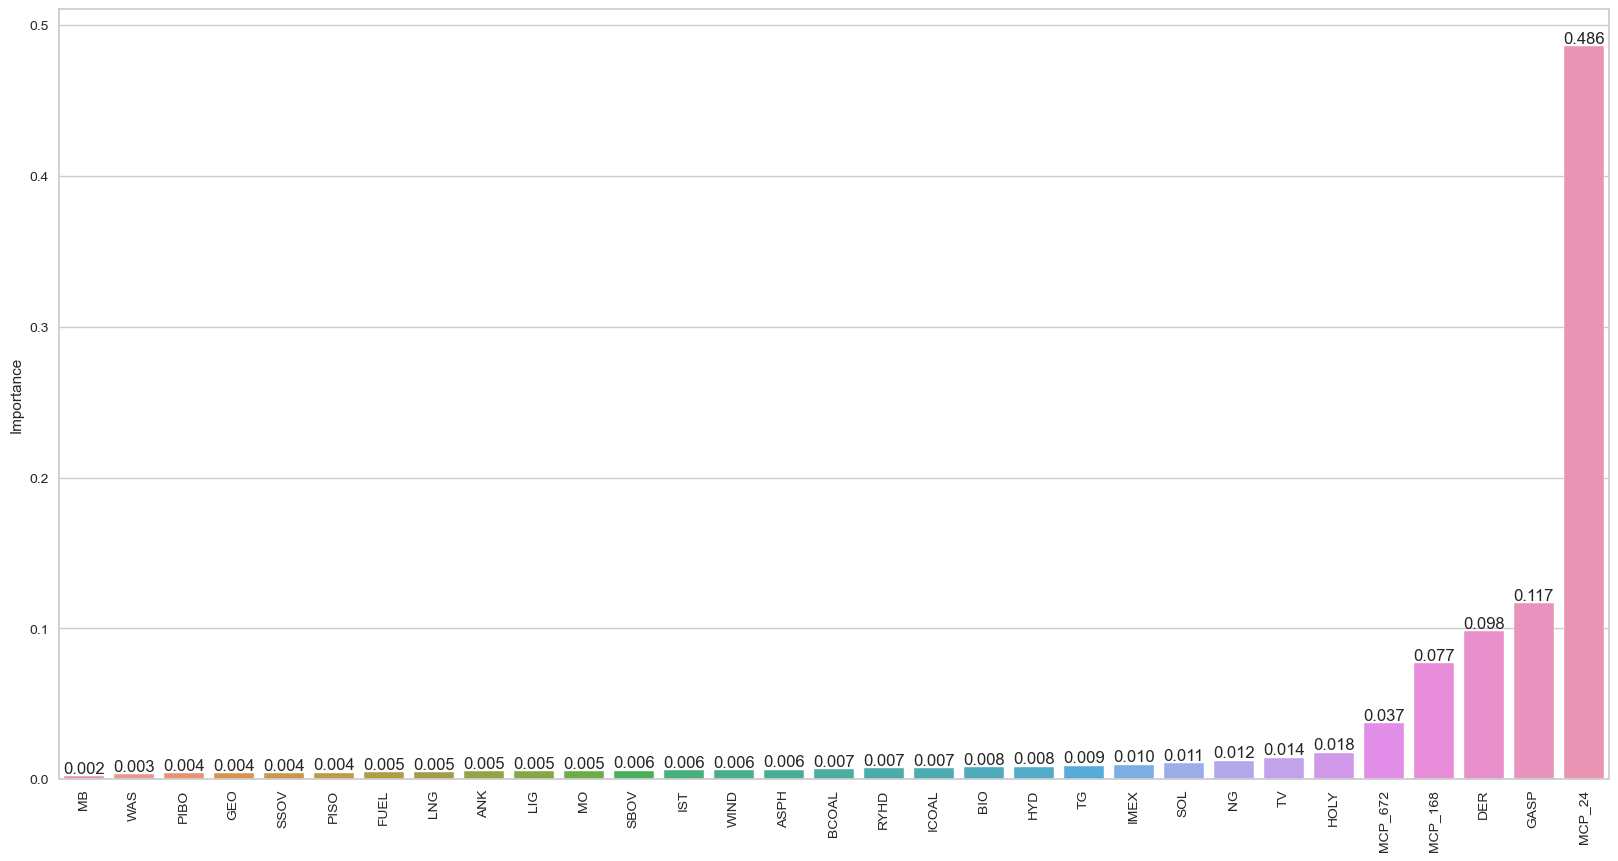

In [79]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=imp_feats.sort_values('Importance'),
                 x=imp_feats.sort_values('Importance').index,
                 y='Importance')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f");

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_2.Random Forest Regression_**</p>

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Vanilla RF_**</p>

In [73]:
operations = [("RF_model", RandomForestRegressor(random_state=35))]

pipe_model_rf = Pipeline(steps=operations)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('RF_model', RandomForestRegressor(random_state=35))])

In [74]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

,train,test
R2,0.990,0.928
mae,2.457,6.695
mse,24.167,181.196
rmse,4.916,13.461
mape,19.569,61.305


### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Cross Validation RF_**</p>

In [75]:
operations = [("RF_model", RandomForestRegressor(random_state=35))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                                0.928
train_r2                               0.990
test_neg_mean_absolute_error          -6.802
train_neg_mean_absolute_error         -2.537
test_neg_mean_squared_error         -179.150
train_neg_mean_squared_error         -25.504
test_neg_root_mean_squared_error     -13.380
train_neg_root_mean_squared_error     -5.050
dtype: float64

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_RF GridsearchCV_**</p>  

In [78]:
param_grid_rf = {"RF_model__criterion":["squared_error", "absolute_error"],  # "poisson"
              "RF_model__n_estimators":[250, 500],
              "RF_model__max_depth": [1, 2],
              "RF_model__min_samples_leaf": [1, 2, 3],
              "RF_model__min_samples_split": [2, 3, 5],
              "RF_model__max_features":['auto', X.shape[1]/3, 6]}

In [79]:
operations = [("RF_model", RandomForestRegressor(random_state=35))]

model = Pipeline(steps=operations)

grid_model_rf = GridSearchCV(estimator=model,
                          param_grid=param_grid_rf,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [ ]:
grid_model_rf.fit(X_train,y_train)

In [ ]:
grid_model_rf.best_estimator_

In [ ]:
eval_metric(grid_model_rf, X_train, y_train, X_test, y_test)

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Error Metrics_**</p>

In [88]:
y_pred_rf = grid_model_rf.predict(X_test)

In [83]:
my_dict_1 = {"Actual": y_test, "Pred": y_pred_rf, "Residual":y_test-y_pred_rf, "LSE":(y_test-y_pred_rf)**2, "ABS": abs(y_test-y_pred_rf)}

In [84]:
comparing_1 = pd.DataFrame(my_dict_1)
comparing_1

,Actual,Pred,Residual,LSE,ABS
3775,11.260,40.673,-29.413,865.127,29.413
12043,41.890,50.978,-9.088,82.597,9.088
1643,73.050,64.833,8.217,67.511,8.217
60437,64.390,63.131,1.259,1.585,1.259
20136,34.920,38.137,-3.217,10.349,3.217
...,...,...,...,...,...
58867,79.860,75.253,4.607,21.224,4.607
47970,46.690,39.165,7.525,56.619,7.525
46333,22.280,26.548,-4.268,18.218,4.268
68201,242.480,232.702,9.778,95.614,9.778


In [85]:
result_sample_1 = comparing_1.iloc[:, :3]
result_sample_1

,Actual,Pred,Residual
3775,11.260,40.673,-29.413
12043,41.890,50.978,-9.088
1643,73.050,64.833,8.217
60437,64.390,63.131,1.259
20136,34.920,38.137,-3.217
...,...,...,...
58867,79.860,75.253,4.607
47970,46.690,39.165,7.525
46333,22.280,26.548,-4.268
68201,242.480,232.702,9.778


<a style="color:Blue" >**R2**</a>

In [89]:
rf_R2 = round(r2_score(y_test, y_pred_rf),2)
rf_R2

0.91

<a style="color:Blue" >**MAE**</a>

In [90]:
rf_mae = round(mean_absolute_error(y_test, y_pred_rf),2)
rf_mae

7.3

<a style="color:Blue" >**MSE**</a>

In [91]:
rf_mse = round(mean_squared_error(y_test, y_pred_rf),2)
rf_mse

162.81

<a style="color:Blue" >**RMSE**</a>

In [92]:
rf_rmse = round(mean_squared_error(y_test, y_pred_rf, squared=False),2)
rf_rmse

12.76

<a style="color:Blue" >**MAPE**</a>

In [93]:
rf_mape = round(mean_absolute_error(y_test, y_pred_rf),2)
rf_mape

7.3

In [91]:
mcp_mean = df["MCP"].mean()
mcp_mean

59.99820001434824

In [92]:
rf_mae / mcp_mean

0.12157405134893047

In [93]:
rf_rmse / mcp_mean

0.21262365899737531

<a style="color:Blue" >**_Plotting residuals_**</a>

In [94]:
residuals_1 = y_test-y_pred_rf

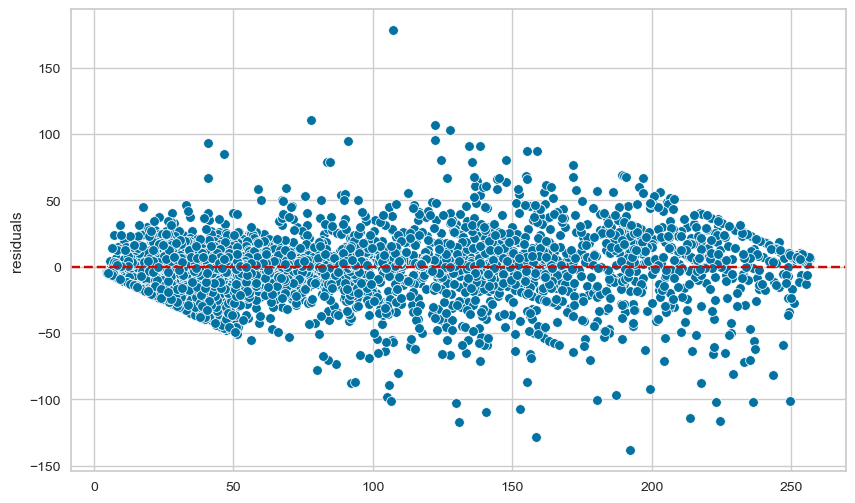

In [95]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_pred_rf, y = residuals_1) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

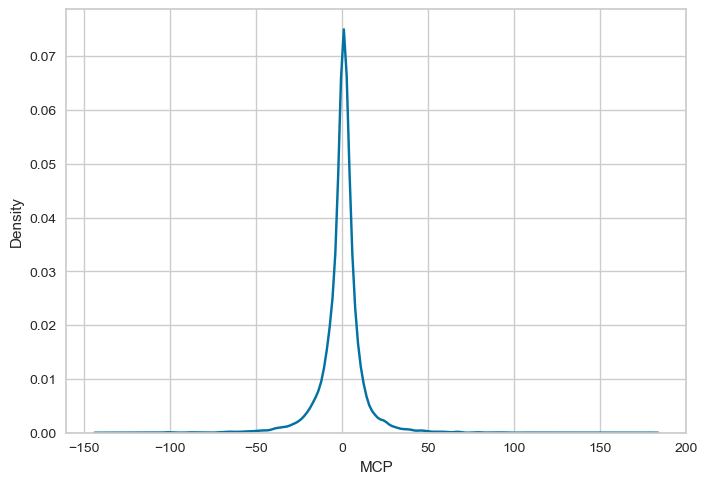

In [96]:
sns.kdeplot(residuals_1)
plt.show();

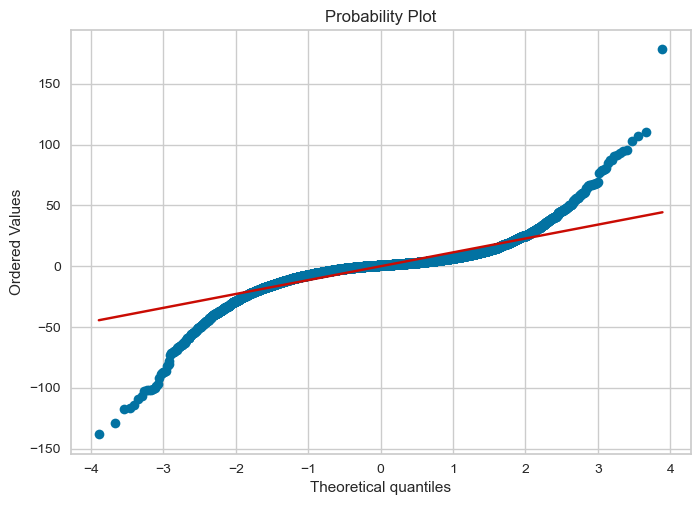

In [97]:
stats.probplot(residuals_1, dist ="norm", plot =plt)
plt.show();

In [98]:
from scipy.stats import skew
skew(residuals_1)

-0.5246453129313382

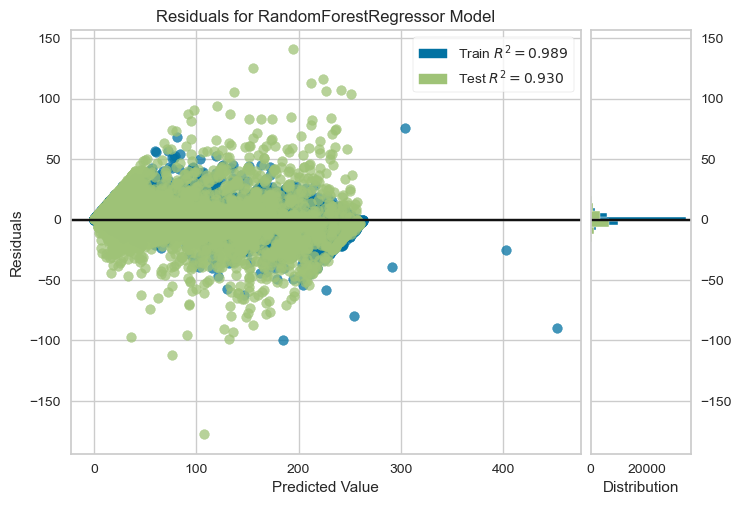

In [99]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
RandomForest = RandomForestRegressor()
visualizer = ResidualsPlot(RandomForest)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

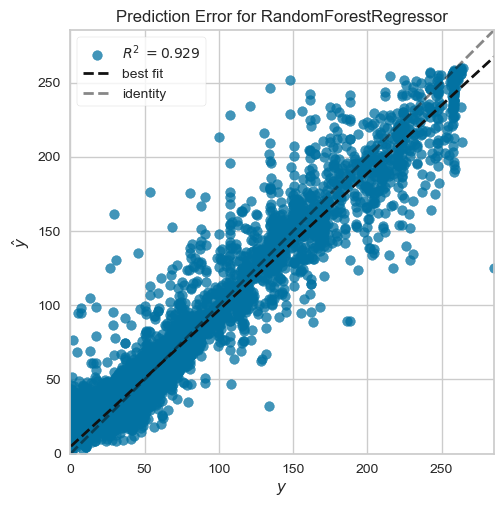

In [100]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
RandomForest = RandomForestRegressor()
visualizer = PredictionError(RandomForest)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Feature Importance_**</p>

In [103]:
feats_1 = pd.DataFrame(index=X_train.columns,
                     data=RandomForest.feature_importances_,
                     columns=['Importance'])
imp_feats_1 = feats_1.sort_values("Importance")
imp_feats_1

,Importance
LNG,0.001
MB,0.001
MO,0.002
SBOV,0.002
PIBO,0.002
ASPH,0.003
SSOV,0.003
PISO,0.003
WAS,0.004
SOL,0.004


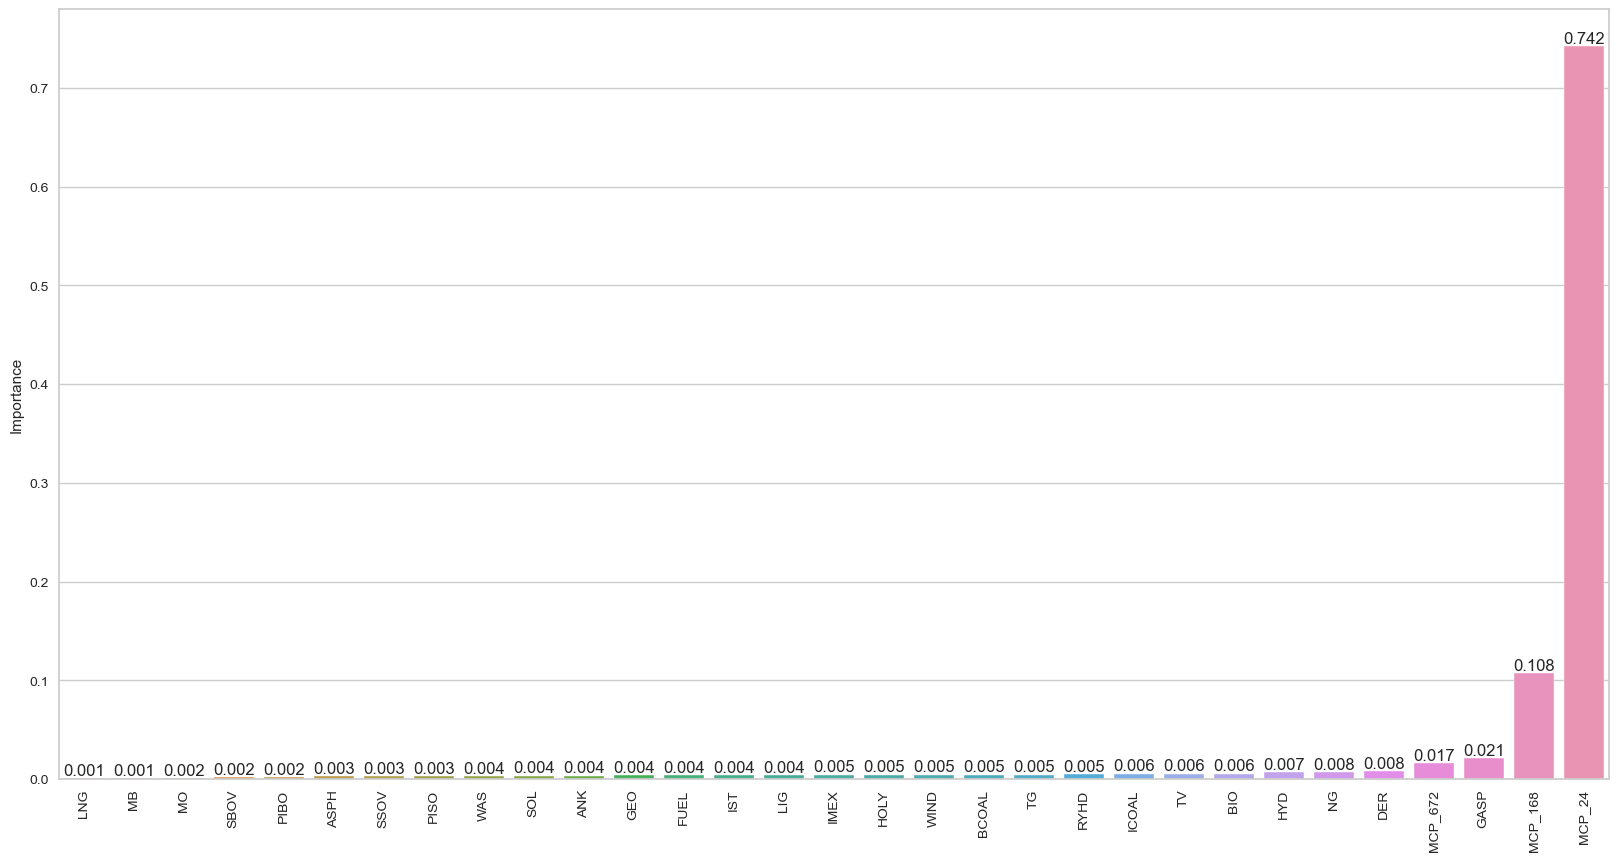

In [104]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=imp_feats_1.sort_values('Importance'),
                 x=imp_feats_1.sort_values('Importance').index,
                 y='Importance')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f");

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_3.Support Vector Regression_**</p>

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Vanilla SVR model_**</p>

In [94]:
operations = [("scaler", scaler), ("SVR", SVR())]

svr_model = Pipeline(steps=operations)

svr_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVR', SVR())])

In [95]:
eval_metric(svr_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.882,0.892
mae,7.962,8.002
mse,207.483,198.252
rmse,14.404,14.080
mape,7.962,8.002


### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Cross Validation SVR_**</p>

In [123]:
operations = [("scaler", scaler), ("SVR", SVR())]

svm_model_cross = Pipeline(steps=operations)

scores = cross_validate(svm_model_cross,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =5,
                        return_train_score=True)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

# Çok önemli not: Eğer datanıza bir dönüşüm işlemi yapıyorsanız CV işleminde mutlaka pipeline kullanın aksi durumda data
# leakage problemi ortaya çıkabilir.

# Dönüşüm işlemi uygulanmış bir datanın CV'de kullanılması da data leakageye neden olacağından CV'na datanın orjinal hali
# verilerek her iterasyondaki yeni train ve yeni test setleri pipeline steplerine uygun olarak  numeric hale dönüştürülüp
# CV'de scorları alınacaktır.

test_r2                                0.879
train_r2                               0.880
test_neg_mean_absolute_error          -8.086
train_neg_mean_absolute_error         -8.042
test_neg_mean_squared_error         -212.232
train_neg_mean_squared_error        -210.581
test_neg_root_mean_squared_error     -14.567
train_neg_root_mean_squared_error    -14.511
dtype: float64

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Error Metrics_**</p>

In [96]:
y_pred_svr = svr_model.predict(X_test)

In [126]:
my_dict_2 = {"Actual": y_test, "Pred": y_pred_svr, "Residual":y_test-y_pred_svr, "LSE":(y_test-y_pred_svr)**2, "ABS": abs(y_test-y_pred_svr)}

In [127]:
comparing_2 = pd.DataFrame(my_dict_2)
comparing_2

,Actual,Pred,Residual,LSE,ABS
3775,11.260,28.631,-17.371,301.766,17.371
12043,41.890,46.921,-5.031,25.311,5.031
1643,73.050,64.465,8.585,73.699,8.585
60437,64.390,59.185,5.205,27.087,5.205
20136,34.920,36.354,-1.434,2.056,1.434
...,...,...,...,...,...
58867,79.860,74.547,5.313,28.231,5.313
47970,46.690,38.323,8.367,70.003,8.367
46333,22.280,35.148,-12.868,165.593,12.868
68201,242.480,254.332,-11.852,140.479,11.852


In [128]:
result_sample_2 = comparing_2.iloc[:, :3]
result_sample_2

,Actual,Pred,Residual
3775,11.260,28.631,-17.371
12043,41.890,46.921,-5.031
1643,73.050,64.465,8.585
60437,64.390,59.185,5.205
20136,34.920,36.354,-1.434
...,...,...,...
58867,79.860,74.547,5.313
47970,46.690,38.323,8.367
46333,22.280,35.148,-12.868
68201,242.480,254.332,-11.852


<a style="color:Blue" >**R2**</a>

In [99]:
svr_R2 = round(r2_score(y_test, y_pred_svr),2)
svr_R2

0.89

<a style="color:Blue" >**MAE**</a>

In [100]:
svr_mae = round(mean_absolute_error(y_test, y_pred_svr),2)
svr_mae

8.0

<a style="color:Blue" >**MSE**</a>

In [101]:
svr_mse = round(mean_squared_error(y_test, y_pred_svr),2)
svr_mse

198.25

<a style="color:Blue" >**RMSE**</a>

In [102]:
svr_rmse = round(mean_squared_error(y_test, y_pred_svr, squared=False),2)
svr_rmse

14.08

<a style="color:Blue" >**MAPE**</a>

In [111]:
svr_mape = round(mean_absolute_error(y_test, y_pred_svr),2)

<a style="color:Blue" >**_Plotting residuals_**</a>

In [136]:
residuals_2 = y_test-y_pred_svr

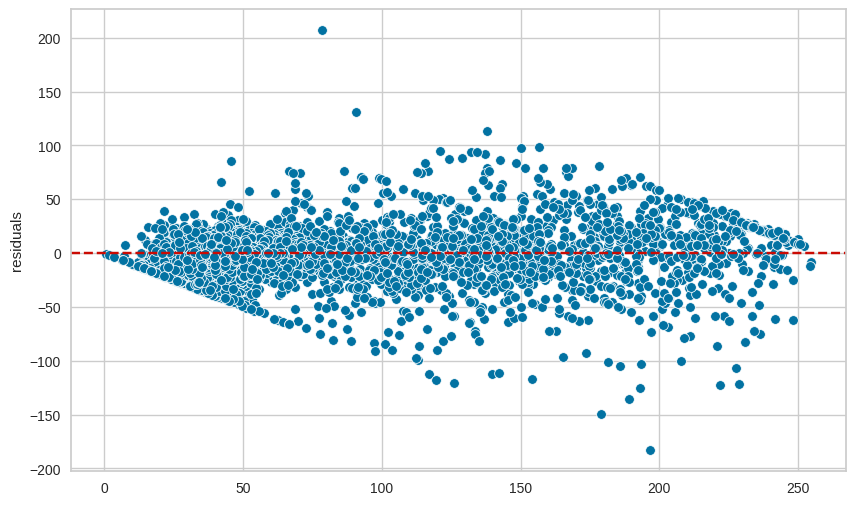

In [137]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_pred_svr, y = residuals_2) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

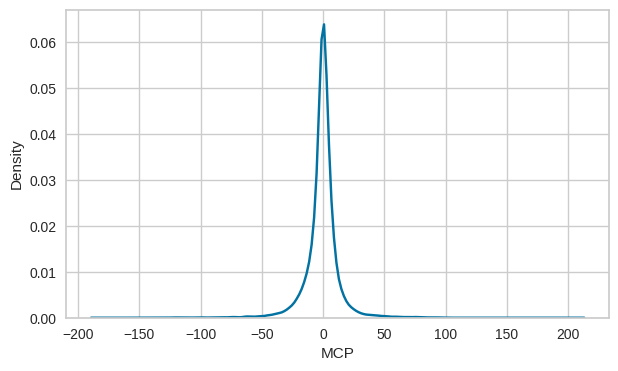

In [138]:
sns.kdeplot(residuals_2)
plt.show();

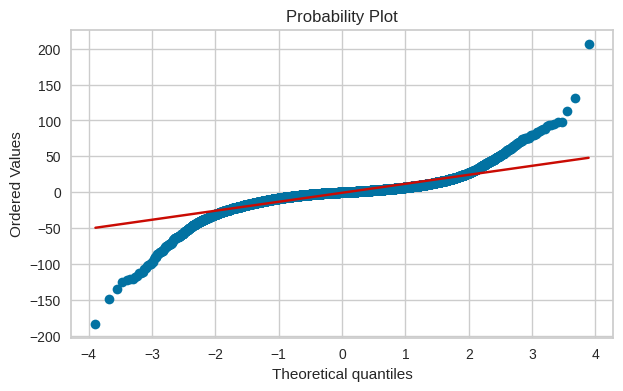

In [139]:
stats.probplot(residuals_2, dist ="norm", plot =plt)
plt.show();

In [140]:
from scipy.stats import skew
skew(residuals_2)

-0.5275510004835879

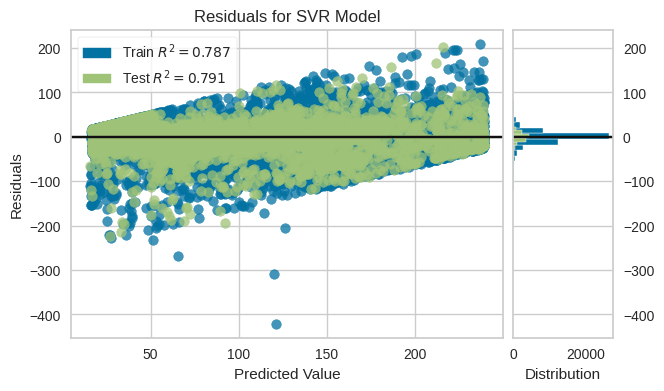

In [141]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
svr = SVR()
visualizer = ResidualsPlot(svr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

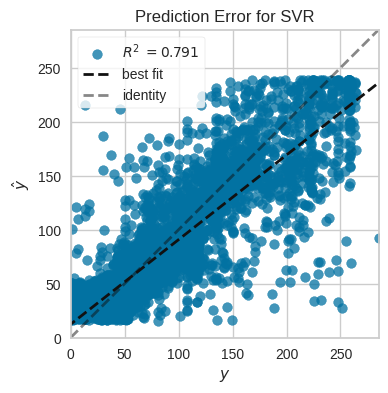

In [142]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
svr = SVR()
visualizer = PredictionError(svr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_4.ANN - Sequential_**</p>

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Vanilla Sequential model_**</p>  

In [ ]:
model3 = Sequential()
model3.add(Dense(64, activation = 'selu', input_dim = X_train.shape[1]))
model3.add(Dense(2048, activation = 'selu'))
model3.add(Dense(1024, activation = 'selu'))
model3.add(Dense(512, activation = 'relu'))
model3.add(Dense(256, activation = 'selu'))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(64, activation = 'selu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(16, activation = 'selu'))
model3.add(Dense(8, activation = 'relu'))
model3.add(Dense(1))

opt = Adam(learning_rate = 0.001) # 0.002
model3.compile(optimizer = opt, loss = 'mse')

In [ ]:
early_stop3 = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [ ]:
model3.fit(x = X_train_scaled, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop3])

In [ ]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot()

In [ ]:
y_pred_1 = model3.predict(X_test_scaled)

In [ ]:
from keras.models import load_model
model_3 = load_model('model3.h5')

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Error Metrics_**</p>

In [62]:
y_pred_sqntl = model_3.predict(X_test_scaled)

436/436 [==============================] - 3s 6ms/step


In [ ]:
y_pred_train = model_3.predict(X_train_scaled)

<a style="color:Blue" >**R2**</a>

In [104]:
sequential_R2 = round(r2_score(y_test, y_pred_sqntl),2)
sequential_R2

0.94

<a style="color:Blue" >**MAE**</a>

In [105]:
sequential_mae = round(mean_absolute_error(y_test, y_pred_sqntl),2)
sequential_mae

6.17

<a style="color:Blue" >**MSE**</a>

In [106]:
sequential_mse = round(mean_squared_error(y_test, y_pred_sqntl),2)
sequential_mse

111.86

<a style="color:Blue" >**RMSE**</a>

In [107]:
sequential_rmse = round(mean_squared_error(y_test, y_pred_sqntl, squared=False),2)
sequential_rmse

10.58

<a style="color:Blue" >**MAPE**</a>

In [ ]:
def mape1(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    absolute_percentage_error[~np.isfinite(absolute_percentage_error)] = 0  # "inf" değerlerini 0'a dönüştür
    return np.mean(absolute_percentage_error) * 100

# y_pred_sqntl'yi 1 boyutlu bir diziye dönüştürme
y_pred_sqntl_1d = y_pred_sqntl.flatten()
y_pred_train_1d = y_pred_train.flatten()

In [108]:
sequential_mape = round(mape1(y_test, y_pred_sqntl_1d), 2)
sequential_mape

6.17

<a style="color:Blue" >**_Plotting residuals_**</a>

In [ ]:
residuals_sqntl = y_test-y_pred_sqntl

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_pred_sqntl, y = residuals_sqntl) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

In [ ]:
sns.kdeplot(residuals_sqntl)
plt.show();

In [ ]:
stats.probplot(residuals_sqntl, dist ="norm", plot =plt)
plt.show();

In [ ]:
from scipy.stats import skew
skew(residuals_sqntl)

In [ ]:

# Modelinizin test verisi üzerindeki tahminlerini alın
y_pred_sqntl = model3.predict(X_test_scaled)


plt.figure(figsize=(8, 6))

# Gerçek ve tahmin edilen değerler arasındaki scatter plot, noktaları yeşil yap
plt.scatter(y_test, y_pred_sqntl, alpha=0.3, color='green')

# Best fit line (en iyi uyum çizgisi) için
m, b = np.polyfit(y_test, y_pred_sqntl, 1)  # 1 dereceli polinom ile uyum sağla

# En iyi uyum çizgisini çiz
plt.plot(y_test, m*y_test + b, color='red')

# Kimlik çizgisi yerine, eksenleri eşitleyerek 45 derecelik bir çizgi çiz
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')

# R^2 değerini hesapla ve sağ alt köşeye yaz
r2 = r2_score(y_test, y_pred_sqntl)
plt.text(0.95, 0.05, f'R² = {r2:.3f}', verticalalignment='bottom', horizontalalignment='right', 
         transform=plt.gca().transAxes, color='black', fontsize=12)

# Eksen etiketlerini ve başlığı ayarlayın
plt.xlabel('Actual Values')
plt.ylabel('Estimated Values')
#plt.title('Prediction Error')

# Grafikleri göster
plt.show()

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_5.DT Regression_**</p>

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Vanilla DT model_**</p>

In [ ]:
operations = [ ("DT_model", DecisionTreeRegressor(random_state=35))]

dt_model = Pipeline(steps=operations)

dt_model.fit(X_train, y_train)

In [ ]:
eval_metric(dt_model, X_train, y_train, X_test, y_test)

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Cross Validation DT_**</p>

In [ ]:
operations = [("DT_model", DecisionTreeRegressor(random_state=35))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_DT GridSearch_**</p>

In [ ]:
param_grid_rf = {
    'max_depth': [3, 5, 10, 15],
    'criterion': ['gini', 'entropy', 'squared_error'],
    'max_features': [10, 15,20]
}

In [ ]:
operations = [("DT_model", DecisionTreeRegressor(random_state=35))]

model = Pipeline(steps=operations)

grid_model_dt = GridSearchCV(estimator=model,
                          param_grid=param_grid_rf,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [ ]:
grid_model_dt.fit(X_train, y_train)

In [ ]:
grid_model_dt.best_params_

In [ ]:
eval_metric(grid_model_dt, X_train, y_train, X_test, y_test)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Error Metrics_**</p>

In [ ]:
y_pred_dt = grid_model_dt.predict(X_test)

In [ ]:
my_dict_dt = {"Actual": y_test, "Pred": y_pred_dt, "Residual":y_test-y_pred_dt, "LSE":(y_test-y_pred_dt)**2, "ABS": abs(y_test-y_pred_dt)}

In [ ]:
comparing_dt = pd.DataFrame(my_dict_dt)
comparing_dt

In [ ]:
result_sample_dt = comparing.iloc[:, :3]
result_sample_dt

<a style="color:Blue" >**R2**</a>


**_R2_score, elimizdeki mevcut featurlar ile targettaki değişimin ne kadarını açıklayabiliyorum.
Veya targetı doğru tahmin edebilmek için gerekli olan bilginin ne kadarına sahibim sorularına cevap verir._**

In [ ]:
dt_R2 = round(r2_score(y_test, y_pred_dt),2)
dt_R2

<a style="color:Blue" >**MAE**</a>


**_Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) mutlak değerlerinin toplamının gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala mutlak hata (mae) tespit edilir. mae yapılan kötü tahminleri cezalandırmadığından tercih edilmez._**

- comparing.ABS.sum() / X_test.shape[0]

In [ ]:
dt_mae = round(mean_absolute_error(y_test, y_pred_dt),2)
dt_mae

<a style="color:Blue" >**MSE**</a>


**_Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) karesinin toplamının gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala kare hata (mse) tespit edilir. mse yapılan kötü tahminleri cezalandırır ama target biriminin karesi olduğundan yorumlanması zordur. Bu sebeple tercih edilmez._**

- comparing.LSE.sum() / X_test.shape[0]

In [ ]:
dt_mse = round(mean_squared_error(y_test, y_pred_dt),2)
dt_mse

<a style="color:Blue" >**RMSE**</a>

**_Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) karesinin toplamının gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala kare hata (mse) tespit edilir ve mse'nin karakökü alınarak error metriğimiz target ile aynı birime dönüştürülür. Bu şekilde yorumlanması ve anlaşılması kolay bir hale gelir. rmse yapılan kötü tahminleri hem cezalandırır hemde targetla aynı birim olduğundan yorumlanması kolaydır. Bu sebeple çoğunlukla bu metric tercih edilir._**

- (comparing.LSE.sum()/X_test.shape[0])**0.5

In [ ]:
dt_rmse = round(mean_squared_error(y_test, y_pred_dt, squared=False),2)
dt_rmse

<a style="color:Blue" >**MAPE**</a>

In [ ]:
dt_mape = round(mape(y_test, y_pred_dt),2)
dt_mape

<a style="color:Blue" >**_Plotting residuals_**</a>

In [ ]:
residuals_1 = y_test-y_pred_dt

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_pred_dt, y = residuals_1) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

In [ ]:
sns.kdeplot(residuals_1)
plt.show();

In [ ]:
stats.probplot(residuals_1, dist ="norm", plot =plt)
plt.show();

In [ ]:
from scipy.stats import skew
skew(residuals_1)

In [ ]:
# Instantiate the linear model and visualizer
from yellowbrick.regressor import ResidualsPlot
DecisionTree = DecisionTreeRegressor()
visualizer = ResidualsPlot(DecisionTree)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [ ]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
DecisionTree = DecisionTreeRegressor()
visualizer = PredictionError(DecisionTree)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_6.CatBoost Regression_**</p>

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Vanilla CatBoost model_**</p>

In [ ]:
operations = [ ("Catboost_model", CatBoostRegressor(random_state=35))]

ctb_model = Pipeline(steps=operations)

ctb_model.fit(X_train, y_train)

In [ ]:
eval_metric(ctb_model, X_train, y_train, X_test, y_test)

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Cross Validation CatBoost_**</p>

In [ ]:
operations = [("Catboost_model", CatBoostRegressor(random_state=35))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_CatBoost GridSearch_**</p>

In [ ]:
param_grid_ctb = {
    'iterations': [250, 300, 350],
    'depth': [5, 7, 9],
    'learning_rate': [0.1, 0.3, 0.5],
    'loss_function': ['Logloss', 'CrossEntropy', 'RMSE'],
    'silent': [True, False]
}

operations = [("XGB_model", XGBRegressor(random_state=35))]

model_ctb = Pipeline(steps=operations)

grid_model_ctb = GridSearchCV(estimator=model_ctb,
                          param_grid=param_grid_ctb,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [ ]:
grid_model_ctb.fit(X_train, y_train)

In [ ]:
grid_model_ctb.best_params_

In [ ]:
eval_metric(grid_model_ctb, X_train, y_train, X_test, y_test)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Error Metrics_**</p>

In [ ]:
y_pred_ctb = grid_model_ctb.predict(X_test)

In [ ]:
my_dict = {"Actual": y_test, "Pred": y_pred_ctb, "Residual":y_test-y_pred_ctb, "LSE":(y_test-y_pred_ctb)**2, "ABS": abs(y_test-y_pred_ctb)}

In [ ]:
comparing = pd.DataFrame(my_dict)
comparing

In [ ]:
result_sample = comparing.iloc[:, :3]
result_sample

<a style="color:Blue" >**R2**</a>


**_R2_score, elimizdeki mevcut featurlar ile targettaki değişimin ne kadarını açıklayabiliyorum.
Veya targetı doğru tahmin edebilmek için gerekli olan bilginin ne kadarına sahibim sorularına cevap verir._**

In [ ]:
ctb_R2 = round(r2_score(y_test, y_pred_ctb),2)
ctb_R2

<a style="color:Blue" >**MAE**</a>


**_Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) mutlak değerlerinin toplamının gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala mutlak hata (mae) tespit edilir. mae yapılan kötü tahminleri cezalandırmadığından tercih edilmez._**

- comparing.ABS.sum() / X_test.shape[0]

In [ ]:
ctb_mae = round(mean_absolute_error(y_test, y_pred_ctb),2)
ctb_mae

<a style="color:Blue" >**MSE**</a>


**_Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) karesinin toplamının gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala kare hata (mse) tespit edilir. mse yapılan kötü tahminleri cezalandırır ama target biriminin karesi olduğundan yorumlanması zordur. Bu sebeple tercih edilmez._**

- comparing.LSE.sum() / X_test.shape[0]

In [ ]:
ctb_mse = round(mean_squared_error(y_test, y_pred_ctb),2)
ctb_mse

<a style="color:Blue" >**RMSE**</a>

**_Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) karesinin toplamının gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala kare hata (mse) tespit edilir ve mse'nin karakökü alınarak error metriğimiz target ile aynı birime dönüştürülür. Bu şekilde yorumlanması ve anlaşılması kolay bir hale gelir. rmse yapılan kötü tahminleri hem cezalandırır hemde targetla aynı birim olduğundan yorumlanması kolaydır. Bu sebeple çoğunlukla bu metric tercih edilir._**

- (comparing.LSE.sum()/X_test.shape[0])**0.5

In [ ]:
ctb_rmse = round(mean_squared_error(y_test, y_pred_ctb, squared=False),2)
ctb_rmse

<a style="color:Blue" >**MAPE**</a>

In [ ]:
ctb_mape = round(mape(y_test, y_pred_ctb),2)
ctb_mape

<a style="color:Blue" >**_Plotting residuals_**</a>

In [ ]:
residuals_ctb = y_test-y_pred_ctb

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_pred_ctb, y = residuals_ctb) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

In [ ]:
sns.kdeplot(residuals_ctb)
plt.show();

In [ ]:
stats.probplot(residuals_ctb, dist ="norm", plot =plt)
plt.show();

In [ ]:
from scipy.stats import skew
skew(residuals_ctb)

In [ ]:
# Instantiate the linear model and visualizer
from yellowbrick.regressor import ResidualsPlot
Ctb = CatBoostRegressor()
visualizer = ResidualsPlot(Ctb)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [ ]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
Ctb = CatBoostRegressor()
visualizer = PredictionError(Ctb)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_7.LightGBM Regression_**</p>

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Vanilla LightGBM model_**</p>

In [ ]:
operations = [("LightGBM_model", lgb.LGBMRegressor(random_state=35))]

pipe_model_lgb = Pipeline(steps=operations)

pipe_model_lgb.fit(X_train, y_train)

In [ ]:
eval_metric(pipe_model_lgb, X_train, y_train, X_test, y_test)

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Cross Validation LightGBM_**</p>

In [ ]:
operations = [("XGB_model", XGBRegressor(random_state=35))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_LightGBM GridSearch_**</p>

In [ ]:
param_grid_lgb = {
    'learning_rate': [0.1, 0.2, 0.3],
    'num_leaves': [50, 60, 70],
    'n_estimators': [300, 350, 400]
}

In [ ]:
operations = [("LightGBM_model", lgb.LGBMRegressor(random_state=35))]

model_lgb = Pipeline(steps=operations)

grid_model_lgb = GridSearchCV(estimator=model_lgb,
                          param_grid=param_grid_lgb,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

grid_model_lgb.fit(X_train, y_train)

In [ ]:
grid_model_lgb.best_params_

In [ ]:
eval_metric(grid_model_lgb, X_train, y_train, X_test, y_test)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Error Metrics_**</p>

In [ ]:
y_pred_lgb = grid_model_lgb.predict(X_test)

In [ ]:
my_dict = {"Actual": y_test, "Pred": y_pred_lgb, "Residual":y_test-y_pred_lgb, "LSE":(y_test-y_pred_lgb)**2, "ABS": abs(y_test-y_pred_lgb)}

In [ ]:
comparing_lgb = pd.DataFrame(my_dict)
comparing_lgb

In [ ]:
result_sample_lgb = comparing.iloc[:, :3]
result_sample_lgb

<a style="color:Blue" >**R2**</a>


**_R2_score, elimizdeki mevcut featurlar ile targettaki değişimin ne kadarını açıklayabiliyorum.
Veya targetı doğru tahmin edebilmek için gerekli olan bilginin ne kadarına sahibim sorularına cevap verir._**

In [ ]:
lgb_R2 = round(r2_score(y_test, y_pred_lgb),2)
lgb_R2

<a style="color:Blue" >**MAE**</a>


**_Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) mutlak değerlerinin toplamının gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala mutlak hata (mae) tespit edilir. mae yapılan kötü tahminleri cezalandırmadığından tercih edilmez._**

- comparing.ABS.sum() / X_test.shape[0]

In [ ]:
lgb_mae = round(mean_absolute_error(y_test, y_pred_lgb),2)
lgb_mae

<a style="color:Blue" >**MSE**</a>


**_Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) karesinin toplamının gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala kare hata (mse) tespit edilir. mse yapılan kötü tahminleri cezalandırır ama target biriminin karesi olduğundan yorumlanması zordur. Bu sebeple tercih edilmez._**

- comparing.LSE.sum() / X_test.shape[0]

In [ ]:
lgb_mse = round(mean_squared_error(y_test, y_pred_lgb),2)
lgb_mse

<a style="color:Blue" >**RMSE**</a>

**_Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) karesinin toplamının gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala kare hata (mse) tespit edilir ve mse'nin karakökü alınarak error metriğimiz target ile aynı birime dönüştürülür. Bu şekilde yorumlanması ve anlaşılması kolay bir hale gelir. rmse yapılan kötü tahminleri hem cezalandırır hemde targetla aynı birim olduğundan yorumlanması kolaydır. Bu sebeple çoğunlukla bu metric tercih edilir._**

- (comparing.LSE.sum()/X_test.shape[0])**0.5

In [ ]:
lgb_rmse = round(mean_squared_error(y_test, y_pred_lgb, squared=False),2)
lgb_rmse

<a style="color:Blue" >**MAPE**</a>

In [ ]:
lgb_mape = round(mape(y_test, y_pred_lgb),2)
lgb_mape

<a style="color:Blue" >**_Plotting residuals_**</a>

In [ ]:
residuals_lgb = y_test-y_pred_lgb

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_pred_lgb, y = residuals_lgb) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();


In [ ]:
sns.kdeplot(residuals_lgb)
plt.show();


In [ ]:
stats.probplot(residuals_lgb, dist ="norm", plot =plt)
plt.show();

In [ ]:
from scipy.stats import skew
skew(residuals_lgb)

In [ ]:
# Instantiate the linear model and visualizer
from yellowbrick.regressor import ResidualsPlot
lgb = lgb.LGBMRegressor()
visualizer = ResidualsPlot(lgb)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();  

In [ ]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lgb = lgb.LGBMRegressor()
visualizer = PredictionError(lgb)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_Compare Scores_**</p>

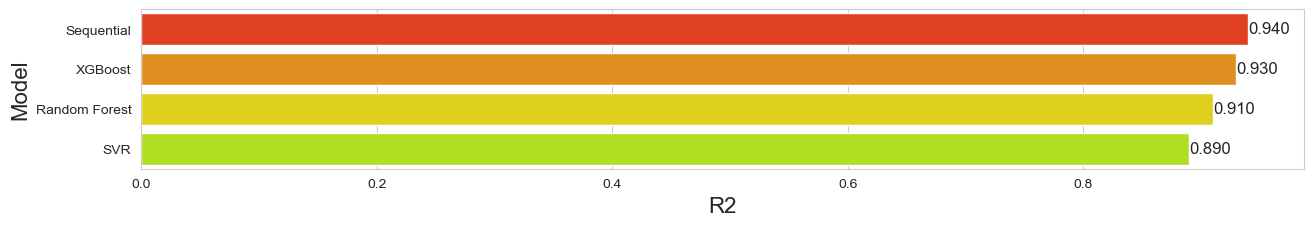

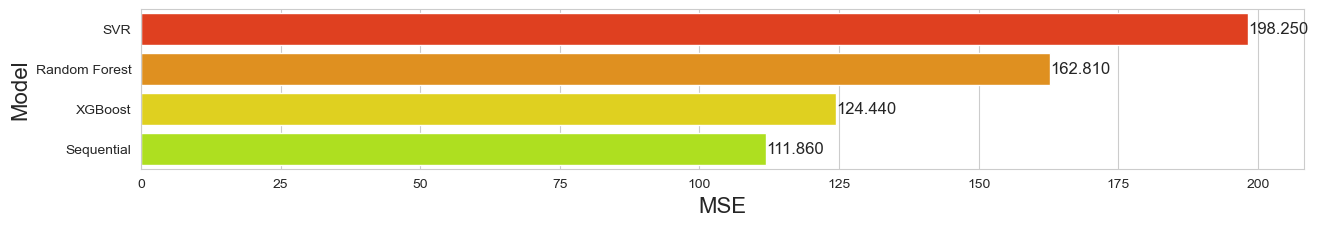

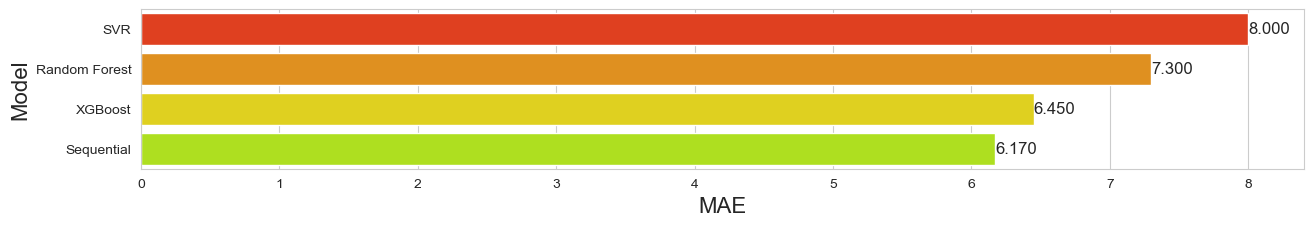

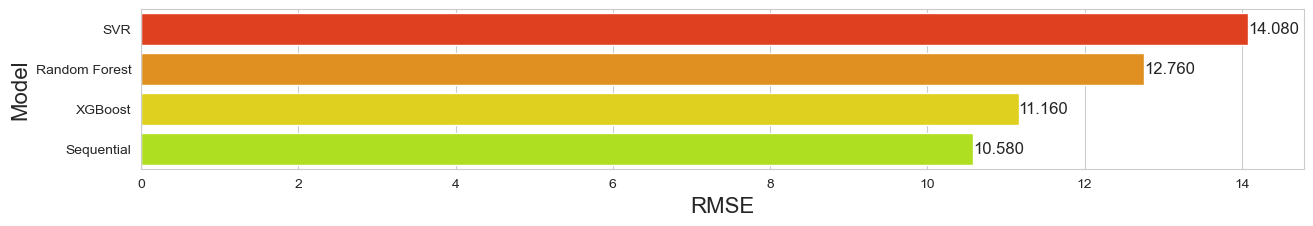

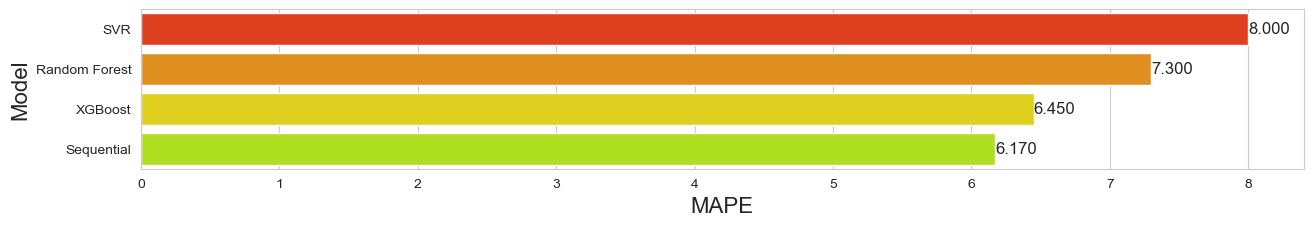

In [117]:

compare = pd.DataFrame({
    "Model": ["DT", "Catboost", "SVR", "Random Forest", "XGBoost", "Sequential", "LightGBM_model"],
    "R2": [dt_R2, ctb_R2, svr_R2, rf_R2, xgb_R2, sequential_R2, lgb_R2],
    "MSE": [dt_mse, ctb_mse, svr_mse, rf_mse, xgb_mse, sequential_mse, lgb_mse],
    "MAE": [dt_mae, ctb_mae, svr_mae, rf_mae, xgb_mae, sequential_mae, lgb_mae],
    "RMSE": [dt_rmse, ctb_rmse, svr_rmse, rf_rmse, xgb_rmse, sequential_rmse, lgb_rmse],
    "MAPE": [dt_mape, ctb_mape, svr_mape, rf_mape, xgb_mape, sequential_mape, lgb_mape]
})

# R2
plt.figure(figsize=(15, 12))
plt.subplot(511)
compare = compare.sort_values(by="R2", ascending=False)
ax = sns.barplot(x="R2", y="Model", data=compare, palette="prism")
ax.set_xlabel("R2", fontsize=16)
ax.set_ylabel("Model", fontsize=16)
for p in ax.patches:
    ax.annotate(f"{p.get_width():.3f}", (p.get_width() + 0.02, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')
plt.show()

# RMSE
plt.figure(figsize=(15, 12))
plt.subplot(514)
compare = compare.sort_values(by="RMSE", ascending=True)
ax = sns.barplot(x="RMSE", y="Model", data=compare, palette="prism")
ax.set_xlabel("RMSE", fontsize=16)
ax.set_ylabel("Model", fontsize=16)
for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}", (p.get_width() + 0.3, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')
plt.show()

# MSE
plt.figure(figsize=(15, 12))
plt.subplot(512)
compare = compare.sort_values(by="MSE", ascending=True)
ax = sns.barplot(x="MSE", y="Model", data=compare, palette="prism")
ax.set_xlabel("MSE", fontsize=16)
ax.set_ylabel("Model", fontsize=16)
for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}", (p.get_width() + 6.0, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')
plt.show()

# MAE
plt.figure(figsize=(15, 12))
plt.subplot(513)
compare = compare.sort_values(by="MAE", ascending=True)
ax = sns.barplot(x="MAE", y="Model", data=compare, palette="prism")
ax.set_xlabel("MAE", fontsize=16)
ax.set_ylabel("Model", fontsize=16)
for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}", (p.get_width() + 0.15, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')
plt.show()

# MAPE
plt.figure(figsize=(15, 12))
plt.subplot(515)
compare = compare.sort_values(by="MAPE", ascending=True)
ax = sns.barplot(x="MAPE", y="Model", data=compare, palette="prism")
ax.set_xlabel("MAPE", fontsize=16)
ax.set_ylabel("Model", fontsize=16)
for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}", (p.get_width() + 2.0, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')
plt.show()

